In [0]:
import tensorflow as tf

## Carregamento dos dados

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v1/keras/datasets/mnist/__init__.py'>

In [0]:
(imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste) = mnist.load_data()

## Entendendo os dados

In [0]:
imagens_treino[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<Figure size 432x288 with 0 Axes>

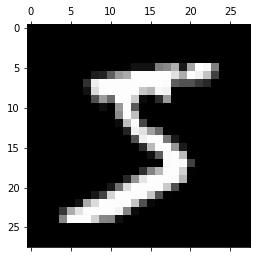

In [0]:
import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(imagens_treino[0]) 
plt.show() 

In [0]:
imagens_treino.shape

(60000, 28, 28)

In [0]:
len(identificacoes_treino)

60000

In [0]:
identificacoes_treino

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
identificacoes_treino[0]

5

## Fazendo a rede

In [0]:
modelo_inicial = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_inicial.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
modelo_inicial.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2012 - acc: 0.9408
Epoch 2/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0811 - acc: 0.9750
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0518 - acc: 0.9835
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0354 - acc: 0.9889
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0281 - acc: 0.9912


In [0]:
print('Métrica inicial')
modelo_inicial.evaluate(imagens_teste, identificacoes_teste)

Métrica inicial
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0688 - acc: 0.9799


[0.0687721946994774, 0.9799]

## Normaliza

In [0]:
# normalizacao
imagens_treino_norm, imagens_teste_norm = imagens_treino / 255.0, imagens_teste / 255.0

In [0]:
modelo_norm = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
modelo_norm.fit(imagens_treino_norm, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1989 - acc: 0.9418
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0807 - acc: 0.9749
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0520 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0360 - acc: 0.9884
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0269 - acc: 0.9914


In [0]:
#perda e acuracia
print("Métrica com normalização")
modelo.evaluate(imagens_teste_norm, identificacoes_teste)

Métrica com normalização
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0666 - acc: 0.9799


[0.06662605672243517, 0.9799]

## Adiciona dropout

In [0]:
modelo_drop = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
modelo_drop.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 158us/sample - loss: 2.8070 - acc: 0.8736
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4266 - acc: 0.9084
Epoch 3/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4166 - acc: 0.9108
Epoch 4/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3818 - acc: 0.9166
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3563 - acc: 0.9211


In [0]:
print('Métrica com normalização e dropout')
modelo_drop.evaluate(imagens_teste, identificacoes_teste)

Métrica com normalização e dropout
10000/10000 [==============================] - 1s 59us/sample - loss: 0.2809 - acc: 0.9483


[0.28093352991903664, 0.9483]

## Normalizacao + dropout

In [0]:
modelo_norm_drop = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
modelo_norm_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
modelo_norm_drop.fit(imagens_treino_norm, identificacoes_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2162 - acc: 0.9360
Epoch 2/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0974 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0686 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0540 - acc: 0.9827
Epoch 5/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0421 - acc: 0.9860


In [0]:
print('Métrica com normalização e dropout')
modelo_norm_drop.evaluate(imagens_teste_norm, identificacoes_teste)

Métrica com normalização e dropout
10000/10000 [==============================] - 1s 64us/sample - loss: 0.0621 - acc: 0.9822


[0.06208285409391392, 0.9822]

## Salva modelo